# Australia - Lhasa spreading rates

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pygplates
import numpy as np
import csv

from velocities_by_plate_id import calculate_velocities
from velocities_by_plate_id import calculate_velocities_along_reconstructed_geometry
from velocities_by_plate_id import calculate_velocities_over_time

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [3]:
rotation_filename = 'Data/Matthews_etal_GPC_2016_410-0Ma_GK07.rot'
reconstruction_feature = 'Data/Matthews_etal_GPC_2016_ContinentalPolygons.gpmlz'
#Asign the play ID using the present day poligons 
#Static lithosphere [master polygons]
#Present day coatlines 
#Continental polygons

australia_plateID = 801

anchor_plate = 0


In [4]:
reconstruction_time = 400 # Ma

reconstructed_shapefile = "reconstruction_{:3.0f}.shp"

pygplates.reconstruct(reconstruction_feature, \
                      rotation_filename, \
                      reconstructed_shapefile.format(reconstruction_time), \
                      reconstruction_time)



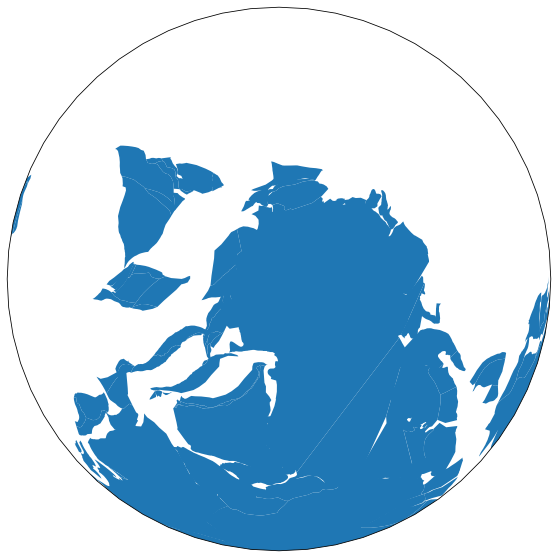

In [5]:
# proj = ccrs.NearsidePerspective(140, -40, satellite_height=4e6)
proj = ccrs.Orthographic(140,-40)
# proj = ccrs.AzimuthalEquidistant(140, -40, )

shp = shpreader.Reader(reconstructed_shapefile.format(reconstruction_time)).geometries()
ft  = cfeature.ShapelyFeature(shp, ccrs.PlateCarree())


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=proj)
ax.add_feature(ft)

In [6]:
import pandas as pd
NWS_coast=pd.read_csv('./NWS_coast.csv', header=None)

In [9]:
points_downunder = np.array(NWS_coast)
npts = points_downunder.shape[0]

# create point features
point_features = []
for lon, lat in points_downunder:
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))
    point_feature.set_reconstruction_plate_id(australia_plateID)
    point_features.append(point_feature)


reconstruction_times = np.arange(0, 400, 1) # Ma

lons_out_Lhasa = np.empty((reconstruction_times.size, npts))
lats_out_Lhasa = np.empty((reconstruction_times.size, npts))
vels_out_Lhasa = np.empty((reconstruction_times.size, npts))

anchor_plate_id=606#This is the ID for Lhasa
radians=1 #This was in the original code that Ben wrote, he said:" This input controls the resampling along line segments, but it shouldn't have any effect for point features (in downunder points)."
for t, reconstruction_time in enumerate(reconstruction_times):
    out_data_Lhasa = calculate_velocities(rotation_filename, point_features, radians, float(reconstruction_time), anchor_plate_id=anchor_plate_id)
    tlon, tlat, vel, ovel, arc, oarc, plateID = np.array(out_data_Lhasa).T
    
    lons_out_Lhasa[t] = tlon
    lats_out_Lhasa[t] = tlat
    vels_out_Lhasa[t] = vel
    
r,c=vels_out_Lhasa.shape #row, col
print (c)
#Calculating the min, mean and max velocities for all the points at each of the time steps
vels_matrix_Lhasa=np.zeros((r,3))
for i in range(0,r,1):
    vels_matrix_Lhasa[i,0]=np.min(vels_out_Lhasa[i,:])
    vels_matrix_Lhasa[i,1]=np.mean(vels_out_Lhasa[i,:])
    vels_matrix_Lhasa[i,2]=np.max(vels_out_Lhasa[i,:])

2267


In [11]:
points_downunder = np.array(NWS_coast)
npts = points_downunder.shape[0]
# create point features

point_features = []
for lon, lat in points_downunder:
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))
    point_feature.set_reconstruction_plate_id(australia_plateID)
    point_features.append(point_feature)


reconstruction_times = np.arange(0, 400, 1) # Ma

lons_out_GI = np.empty((reconstruction_times.size, npts))
lats_out_GI = np.empty((reconstruction_times.size, npts))
vels_out_GI = np.empty((reconstruction_times.size, npts))

# 501 Tethyan Himalayan microcontinent of Greater India
for t, reconstruction_time in enumerate(reconstruction_times):
    out_data_GI = calculate_velocities(rotation_filename, point_features, 1, float(reconstruction_time), anchor_plate_id=501)
    tlon, tlat, vel, ovel, arc, oarc, plateID = np.array(out_data_GI).T
    
    lons_out_GI[t] = tlon
    lats_out_GI[t] = tlat
    vels_out_GI[t] = vel
    
r,c=vels_out_GI.shape #row, col
#Calculating the min, mean and max velocities for all the points at each of the time steps
vels_matrix_GI=np.zeros((r,3))
for i in range(0,r,1):
    vels_matrix_GI[i,0]=np.min(vels_out_GI[i,:])
    vels_matrix_GI[i,1]=np.mean(vels_out_GI[i,:])
    vels_matrix_GI[i,2]=np.max(vels_out_GI[i,:])

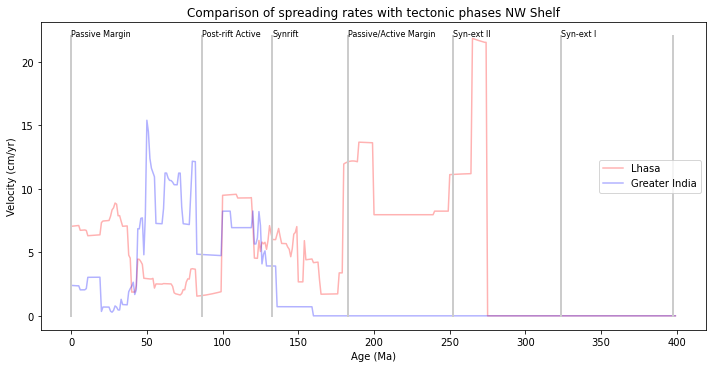

In [17]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlabel='Age (Ma)', ylabel='Velocity (cm/yr)')

b_phase=[0, 86.3, 132.9, 182.7,251.9, 323.2,397.5]
b_phase_text=["Passive Margin", "Post-rift Active",  "Synrift", "Passive/Active Margin","Syn-ext II","Syn-ext I"]


plt.plot(reconstruction_times, vels_matrix_Lhasa[:,1], color=(1, 0, 0,0.3 ), label="Lhasa")
plt.plot(reconstruction_times, vels_matrix_GI[:,1], color=(0, 0, 1,0.3 ), label="Greater India")


#Adding tectonic phases NWS
for i in range(0,len(b_phase),1):
    plt.plot([b_phase[i],b_phase[i]], [ 0,22],  color=(.8, 0.8, 0.8 ), lw=2)

fs=8
for i in range(0,len(b_phase_text),1):
    plt.text((b_phase[i]+b_phase[i])/2,22, b_phase_text[i], fontsize=fs)

plt.tight_layout()
plt.title("Comparison of spreading rates with tectonic phases NW Shelf") 
locs=np.arange(0, 400, step=10)
ax.legend()
#plt.savefig("./AU-GreaterIndia_spreading_rates&tectonics_NWS_Matthews_etal_GPC_2016_410-0Ma_GK07.pdf")

In [18]:
#This is how to get the plate ID's
feat = pygplates.FeatureCollection(reconstruction_feature)
for f in feat:
    print (f.get_reconstruction_plate_id(), f.get_name())

104 Mexico
630 Honshu and Kyushu, Japan
625 C. Hokkaido
329 Betic (Spain)
503 Arabia
505 Lut (Iran)
50601 Helmand (Central Afghanistan)
7701 Tunisia
501 India
616 East Qiangtang
613 Dangerous Grounds and Reed Bank
216 Cayman Ridge, Caribbean
612 Northside South China Sea
205 Northern Yucatan Basin
601 Sea of Japan
821 Tonga Ridge
823 Kermadec Ridge
253 S Hispanola (San Juan)
628 Central Honshu
401 Peri Siberia
373 Novaya-Semya
372 Yamal Peninsula (western Kara Sea)
302 Eurasia
311 East Svalbard, Northern Europe
886 Southern Dampier Ridge, Tasman Sea
283 North Patagonian Massif
813 Eastern Province, southern South Island, NZ
813 South New Zealand & Campbell Plateau
222 Jamacia
212 Guayape, Central America
834 Norfolk
835 Three Kings Rise
844 North Norfolk Ridge
847 North Bismark Basin
679 West Halmahera Block
697 East Halmahera Block
69702 Torricelli Terrane, North New Guinea
604 Indochina
604 Indochina
60402 Malay Peninsula
18102 Ruby Terrane
602 South China
602 South China
602 West Ta